In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier nettoyé
data_path = "/home/noums/airflow/dags/weather/data/processed/cleaned_weather_data.csv"
df = pd.read_csv(data_path, encoding='utf-8-sig')

# Vérifier les premières lignes
print(df.head())
print("\nStatistiques descriptives :")
print(df.describe())

   ville     pays continent        date  temperature  humidite  pression  \
0  Abuja  Nigeria   Afrique  2022-06-25         24.1        80    1013.4   
1  Abuja  Nigeria   Afrique  2022-06-26         23.5        85    1013.4   
2  Abuja  Nigeria   Afrique  2022-06-27         24.2        84    1013.4   
3  Abuja  Nigeria   Afrique  2022-06-28         25.2        78    1013.4   
4  Abuja  Nigeria   Afrique  2022-06-29         24.1        87    1013.4   

   precipitation      source         extracted_at  is_historical  
0            0.3  Open-Meteo  2025-07-01 15:21:16           True  
1            2.2  Open-Meteo  2025-07-01 15:21:16           True  
2            4.5  Open-Meteo  2025-07-01 15:21:16           True  
3            0.3  Open-Meteo  2025-07-01 15:21:16           True  
4           23.6  Open-Meteo  2025-07-01 15:21:16           True  

Statistiques descriptives :
        temperature      humidite      pression  precipitation
count  55011.000000  55011.000000  55011.000000  

In [ ]:
# Confirmation des colonnes et des types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55011 entries, 0 to 55010
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ville          55011 non-null  object 
 1   pays           55011 non-null  object 
 2   continent      55011 non-null  object 
 3   date           55011 non-null  object 
 4   temperature    55011 non-null  float64
 5   humidite       55011 non-null  int64  
 6   pression       55011 non-null  float64
 7   precipitation  55011 non-null  float64
 8   source         55011 non-null  object 
 9   extracted_at   55011 non-null  object 
 10  is_historical  55011 non-null  bool   
dtypes: bool(1), float64(3), int64(1), object(6)
memory usage: 4.2+ MB
None


In [ ]:
# Vérification des valeurs manquantes
df.isnull().sum()

ville            0
pays             0
continent        0
date             0
temperature      0
humidite         0
pression         0
precipitation    0
source           0
extracted_at     0
is_historical    0
dtype: int64

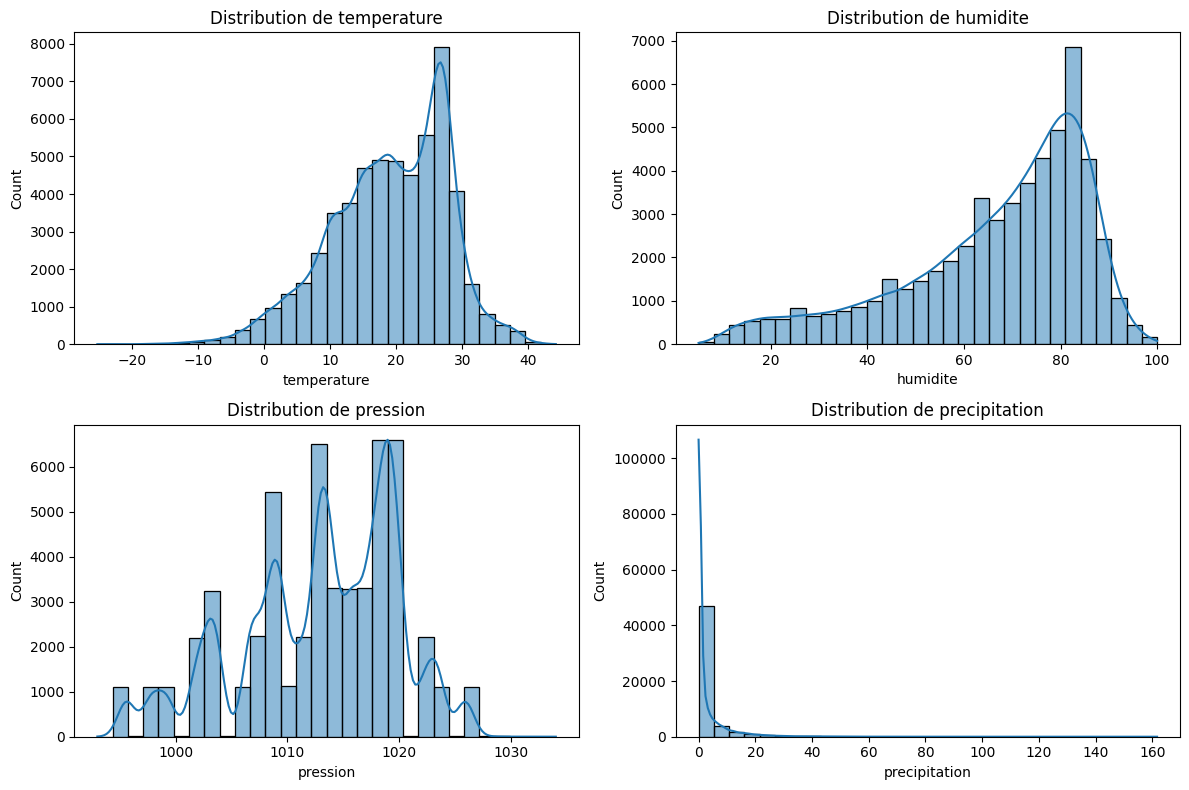

In [14]:
# Visualisation la distribution de chaque variable numérique
plt.figure(figsize=(12, 8))
for i, col in enumerate(['temperature', 'humidite', 'pression', 'precipitation'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution de {col}')
plt.tight_layout()
plt.show()

In [15]:
# Vérification des valeurs extrêmes
print("Enregistrements avec précipitation > 100 mm :")
print(df[df['precipitation'] > 100][['ville', 'pays', 'continent', 'date', 'precipitation', 'source', 'is_historical']])

Enregistrements avec précipitation > 100 mm :
           ville          pays continent        date  precipitation  \
20605      Hanoï       Vietnam      Asie  2024-07-23          135.3   
20651      Hanoï       Vietnam      Asie  2024-09-07          121.9   
25135  La Havane          Cuba  Amérique  2024-11-06          115.3   
31032    Manille   Philippines      Asie  2022-10-29          131.5   
31706    Manille   Philippines      Asie  2024-09-02          109.4   
35034  New Delhi          Inde      Asie  2024-09-12          100.9   
38215     Ottawa        Canada  Amérique  2024-08-09          122.8   
48011       Suva         Fidji   Océanie  2024-05-05          161.7   
48482      Séoul  Corée Du Sud      Asie  2022-08-09          107.7   
49634      Tokyo         Japon      Asie  2022-09-24          102.5   

           source  is_historical  
20605  Open-Meteo           True  
20651  Open-Meteo           True  
25135  Open-Meteo           True  
31032  Open-Meteo           True

In [ ]:
# Vérification des statistiques par ville pour détecter des anomalies
print(df.groupby('ville')[['temperature', 'humidite', 'pression', 'precipitation']].mean())

                temperature   humidite     pression  precipitation
ville                                                             
Abuja             26.665190  58.926763  1013.400000       2.379197
Accra             26.544801  82.275769  1013.900000       2.653741
Addis-Abeba       15.513132  68.552682  1015.800000       3.561412
Alger             19.334069  72.101266  1017.400000       1.234763
Amsterdam         11.576392  80.541591  1019.200000       2.799270
Ankara            13.408915  59.922242  1012.900000       1.178285
Antananarivo      18.453499  75.666365  1023.500000       3.536953
Athènes           19.119340  60.880651  1012.600000       1.332391
Bagdad            25.916275  37.760398   997.800000       0.518248
Bamako            28.421682  48.430380  1011.000000       2.287318
Bangkok           28.358698  73.641049  1007.100000       4.821533
Berlin            11.429340  74.528029  1019.100000       1.793613
Brasília          21.842803  65.040687  1020.100000       3.03

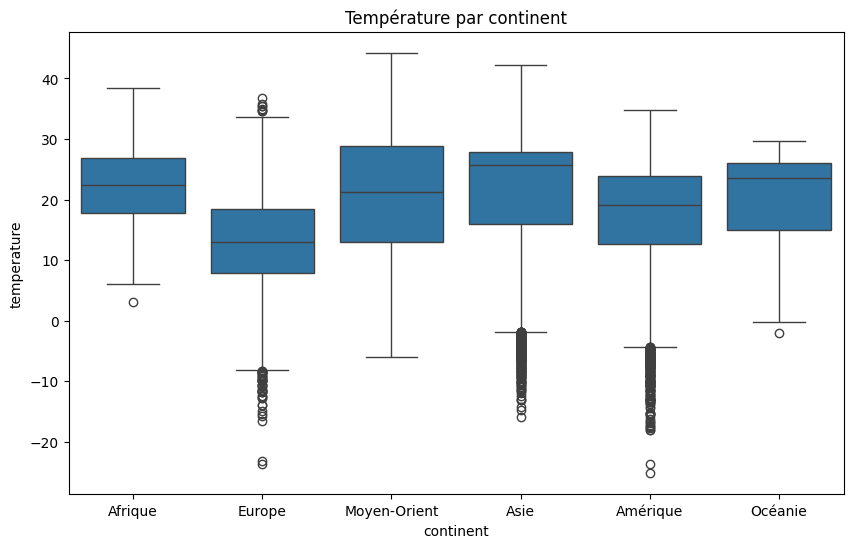

In [19]:
# Visualisation des températures moyennes par continent
plt.figure(figsize=(10, 6))
sns.boxplot(x='continent', y='temperature', data=df)
plt.title('Température par continent')
plt.show()

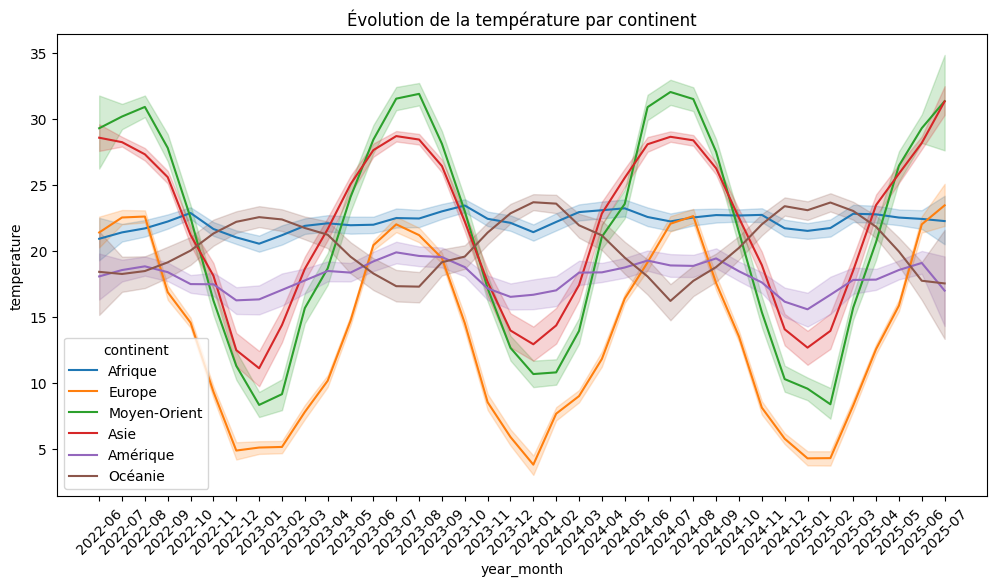

In [24]:
# Vérification de l'évolution des variables au fil du temps
df['date'] = pd.to_datetime(df['date'])
df['year_month'] = df['date'].dt.to_period('M').astype(str)  # Convertir en chaîne
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_month', y='temperature', hue='continent', data=df)
plt.title('Évolution de la température par continent')
plt.xticks(rotation=45)
plt.show()

In [21]:
# Comparaison des statistiques pour les données historiques et quotidiennes
print("Statistiques pour données historiques :")
print(df[df['is_historical'] == True][['temperature', 'humidite', 'pression', 'precipitation']].describe())
print("\nStatistiques pour données quotidiennes :")
print(df[df['is_historical'] == False][['temperature', 'humidite', 'pression', 'precipitation']].describe())

Statistiques pour données historiques :
        temperature      humidite      pression  precipitation
count  54521.000000  54521.000000  54521.000000   54521.000000
mean      19.077385     66.731260   1012.850166       2.591156
std        8.785965     19.260405      6.966563       6.555098
min      -25.200000      6.000000    995.600000       0.000000
25%       13.300000     57.000000   1008.400000       0.000000
50%       20.000000     72.000000   1013.800000       0.000000
75%       26.100000     81.000000   1018.700000       1.900000
max       43.400000    100.000000   1025.900000     161.700000

Statistiques pour données quotidiennes :
       temperature    humidite     pression  precipitation
count   490.000000  490.000000   490.000000     490.000000
mean     23.944102   62.265306  1012.838776       2.557750
std       8.156754   24.821716     7.877158       1.821143
min      -1.990000    5.000000   993.000000       0.061953
25%      18.992500   45.000000  1008.000000       1.2347

In [22]:
# Identification des valeurs aberrantes non filtrées
print("Températures extrêmes :")
print(df[(df['temperature'] < -20) | (df['temperature'] > 40)][['ville', 'pays', 'date', 'temperature']])
print("\nPrécipitations élevées :")
print(df[df['precipitation'] > 100][['ville', 'pays', 'date', 'precipitation']])

Températures extrêmes :
        ville             pays       date  temperature
8810   Bagdad             Irak 2022-07-19        40.50
8811   Bagdad             Irak 2022-07-20        41.00
8823   Bagdad             Irak 2022-08-01        40.10
8824   Bagdad             Irak 2022-08-02        41.10
8825   Bagdad             Irak 2022-08-03        41.60
...       ...              ...        ...          ...
37662  Ottawa           Canada 2023-02-03       -23.70
37663  Ottawa           Canada 2023-02-04       -25.20
45114   Riyad  Arabie Saoudite 2025-06-30        42.17
45115   Riyad  Arabie Saoudite 2025-07-01        40.08
45117   Riyad  Arabie Saoudite 2025-07-03        41.94

[65 rows x 4 columns]

Précipitations élevées :
           ville          pays       date  precipitation
20605      Hanoï       Vietnam 2024-07-23          135.3
20651      Hanoï       Vietnam 2024-09-07          121.9
25135  La Havane          Cuba 2024-11-06          115.3
31032    Manille   Philippines 2022-10-

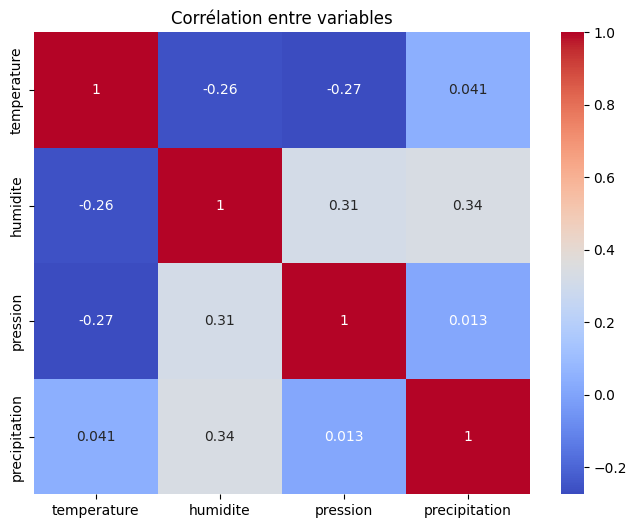

In [8]:
# Vérification des corrélations entre les variables numériques
plt.figure(figsize=(8, 6))
sns.heatmap(df[['temperature', 'humidite', 'pression', 'precipitation']].corr(), annot=True, cmap='coolwarm')
plt.title('Corrélation entre variables')
plt.show()